In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import numpy.random as rng
import math
import pandas as pd



# Hyperparameters
my_s1 = 25
my_s2 = 25
var_s1 = 25/3
var_s2 = 25/3
var_t = 25/3
var_T = var_s1 + var_s2 + var_t

t_guess = 1 #unknown t in mean vector, init guess

# 2D case
my_S = [my_s1, my_s2]
sigma_s = [[var_s1, 0], [0, var_s2]]
sigma_t = var_t

# Samples
num_samples = 10200
s_sample = np.zeros((num_samples, 2))
t_sample = np.zeros(num_samples)

# Task specifik covariance matrix
#det_T = 1/((1/var_s1+1/var_t)*(1/var_s2+1/var_t)-1/var_t**2)

# Gibbs Sampler
# Calculate my using corolary 1 
#Sigmaaa_T = det_T*np.array([[1/var_s2 + 1/var_t, 1/var_t], [1/var_t, 1/var_s1 + 1/var_t]])
def update_my(t, my_s1, var_s1, my_s2, var_s2, var_t, Sigma_T):
    return Sigma_T@np.array([[my_s1/var_s1 + t/var_t], [my_s2/var_s1 - t/var_t]])

# Gibbs Sampler function
# s_sample and t_ sample are two/one dimentional vectors storing the values calculated 
def gibbs_sample(t_guess, my_s1, var_s1, my_s2, var_s2, var_t, Sigma_T, s_sample, t_sample, y, num_samples):
    my = update_my(t_guess, my_s1, var_s1, my_s2, var_s2, var_t, Sigma_T)
    s_sample[0] = rng.multivariate_normal(my.T[0], sigma_s)
    t_sample[0] = t_guess
    a = -math.inf
    b = 0
    if(y > 0):
        a = 0
        b = math.inf
    for i in range(num_samples):
        #my_t = Sigma_T@np.array([[my_s1/var_s1 + t_sample[i-1]/var_t], [my_s2/var_s1 - t_sample[i-1]/var_t]])
        my = update_my(t_sample[i-1], my_s1, var_s1, my_s2, var_s2, var_t, Sigma_T)
        s_sample[i] = rng.multivariate_normal(my.T[0], Sigma_T)
        t_sample[i] = sp.stats.truncnorm.rvs(a, b, s_sample[i-1][0]-s_sample[i-1][1], var_t)


In [ ]:
samples =[3200]

for sample in samples:
    s_sample = np.zeros((sample, 2))
    t_sample = np.zeros(sample)
    gibbs_sample(t_guess, my_s1, var_s1, my_s2, var_s2, var_t, Sigma_T, s_sample, t_sample, 1, sample)
    s1_spred = np.mean(s_sample[200:, 0])
    s1_vpred = np.std(s_sample[200:, 0])
    s2_spred = np.mean(s_sample[200:, 1])
    s2_vpred = np.std(s_sample[200:, 1])
    x = np.linspace(0, 60, 1000)
    #plt.hist(s_sample[200:], bins=50, density=True)
    #plt.plot(x, sp.stats.norm.pdf(x, s1_spred, s1_vpred), label=sample)
    #plt.plot(x, sp.stats.norm.pdf(x, s2_spred, s2_vpred), label=sample)
    plt.plot(s_sample[:200,0])
#plt.legend()
plt.show()
    
    
# Trying to find burnin
x = list()
for i in range(int(s_sample.__len__()/10)):
    mean = sp.stats.norm.mean(t_sample[range(i, i+100)])
    x.append(mean[0])

# Burn in
b_in = 200
s1_spred = np.mean(s_sample[b_in:, 0])
s1_vpred = np.std(s_sample[b_in:, 0])
s2_spred = np.mean(s_sample[b_in:, 1])
s2_vpred = np.std(s_sample[b_in:, 1])


x = np.linspace(0, 60, 1000)
plt.hist(s_sample[200:], bins=50, density=True)
plt.plot(x, sp.stats.norm.pdf(x, s1_spred, s1_vpred))
plt.plot(x, sp.stats.norm.pdf(x, s2_spred, s2_vpred))
plt.show()

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]
[[29.32689709 24.78194155]
 [22.98221642 22.24379455]
 [26.48959891 18.68813376]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
0
[25, 5.757776076963223]


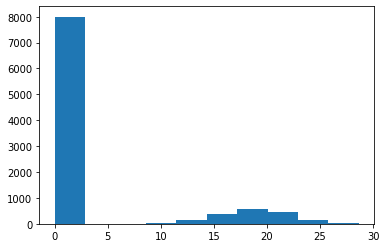

[[26.5817308  24.95045801]
 [23.10361673 28.32223725]
 [25.4228761  31.72044946]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[24.74834322 22.29987477]
 [26.26929346 28.82692404]
 [24.03680381 26.02221482]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[23.31841548 22.76989298]
 [33.18302588 24.332049  ]
 [22.59337384 19.46454606]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
no update, draw
[[26.01128721 22.18573581]
 [24.25222488 20.00123752]
 [30.01329448 23.81018575]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[26.74882149 23.83665261]
 [19.79876216 26.23996393]
 [21.48307016 31.1297264 ]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[21.72016789 26.83077655]
 [30.71842546 25.94856922]
 [29.05814942 24.90436712]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0

KeyboardInterrupt: 

In [2]:
with open('SerieA.CSV', 'r') as f:
    A = pd.read_csv(f)
print(A)

mean_dict = dict()
std_dict = dict()

start_mean = 25
start_std = 25/3
N = 2200
# Fill dicts with team name and init values
for team in A['team1']:
    if(team not in mean_dict):
        mean_dict[team] = [start_mean]
        std_dict[team] = [start_std]


vart = 25/3
t_guess = 1000
for index, row in A.iterrows():
    
    result = row['score1']-row['score2']
    if(result==0):
        print('no update, draw')       
    else:
        s_sample1 = np.zeros((num_samples, 2))
        t_sample1 = np.zeros(num_samples)
        my1 = mean_dict[row['team1']][-1]
        my2 = mean_dict[row['team2']][-1]
        std1 = std_dict[row['team1']][-1]
        std2 = std_dict[row['team2']][-1]
        my = [my1, my2]
        var = [[std1, 0], [0, std2]]
        det = 1/((1/std1+1/vart)*(1/std2+1/vart)-1/vart**2)
        cov = det*np.array([[1/std2 + 1/vart, 1/vart], [1/vart, 1/std2 + 1/vart]])
        #gibbs_sample(t_guess, my_s1, var_s1, my_s2, var_s2, var_t, Sigma_T, s_sample, t_sample, y, num_samples):
        gibbs_sample(t_guess, my1, std1, my2, std2, vart, cov, s_sample1, t_sample1, result, N)
        
        b_in = 400

        # Calculate new mean and var
        s1spred = np.mean(s_sample1[b_in:, 0])
        s1vpred = np.std(s_sample1[b_in:, 0])
        s2spred = np.mean(s_sample1[b_in:, 1])
        s2vpred = np.std(s_sample1[b_in:, 1])
        # Insert new values in dict
        mean_dict[row['team1']].append(s1spred)
        std_dict[row['team1']].append(s1vpred)
        mean_dict[row['team2']].append(s2spred)
        std_dict[row['team2']].append(s2vpred)
        print(s_sample1)
        if(index%50 == 0):
            print(index)
            print(mean_dict['Juventus'])
            plt.hist(s_sample1[b_in:,0])
            plt.show()

In [ ]:
print(std_dict['Juventus'])
x = np.linspace(0, 60, 1000)
plt.plot(x, sp.stats.norm.pdf(x, mean_dict['Juventus'][-1], std_dict['Juventus'][-1]))
plt.plot(x, sp.stats.norm.pdf(x, mean_dict['Parma'][-1], std_dict['Parma'][-1]))
plt.show()